#### Macrotrends Data Download						
						
Bhopal	 India Metro Area Population 1950-2023					
Original Source: United Nations - World Population Prospects						
https://www.macrotrends.net/cities/21195/bhopal/population

In [1]:
# Import libraries
import pandas as pd
import numpy as np

In [2]:
# Import module
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import data
df = pd.read_csv('Bhopal_population_2023_11_22.csv')

In [4]:
# Look at first few rows
df.head()

,date,Population,Annual_Change
0,31-12-1950,100000,NaN
1,31-12-1951,105000,5.00
2,31-12-1952,114000,8.57
3,31-12-1953,123000,7.89
4,31-12-1954,133000,8.13


In [5]:
# Look at data info
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           86 non-null     object 
 1   Population     86 non-null     int64  
 2   Annual_Change  85 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ KB


In [6]:
# Look at column names
df.columns

Index(['date', 'Population', 'Annual_Change'], dtype='object')

In [7]:
# Look for nan 
df.isna().sum()

date             0
Population       0
Annual_Change    1
dtype: int64

In [8]:
# Look at statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,86.0,1.299698e+06,976193.725588,100000.0,395750.00,1126500.00,2042000.00,3348000.00
Annual_Change,85.0,4.234353e+00,1.916129,2.1,2.58,3.26,5.63,8.57


In [20]:
# Check for outliers

# Calculating Q1, Q3, and IQR
Q1 = df['Annual_Change'].quantile(0.25)
Q3 = df['Annual_Change'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df[(df['Annual_Change'] < lower_bound) | (df['Annual_Change'] > upper_bound)]

if not outliers.empty:
    print(outliers)
else:
    print('No outliers detected')

No outliers detected


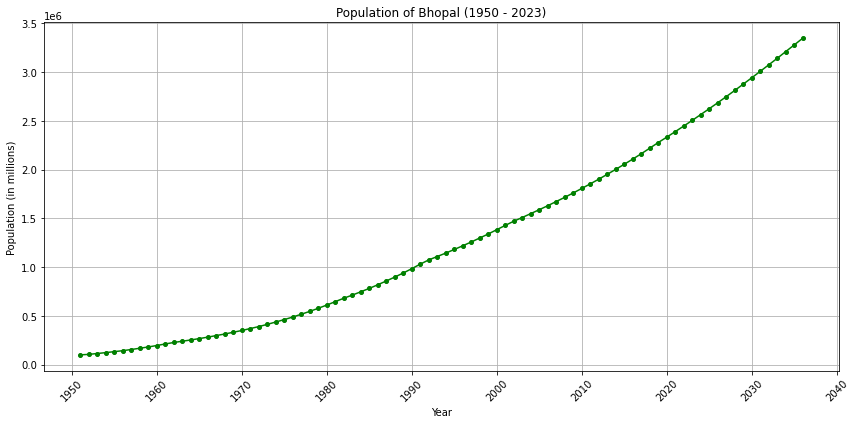

In [9]:
# Import plotting library
import matplotlib.pyplot as plt


# Convert 'date' to datetime format and sort the data
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Population'], color='green', marker='o', markersize=4)
plt.title('Population of Bhopal (1950 - 2023)')
plt.xlabel('Year')
plt.ylabel('Population (in millions)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


The graph presents the population growth in Bhopal from 1950 to 2023, showcasing a clear upward trend over the years. Each data point on the graph corresponds to the population at the end of each year. 

From the initial population recorded in 1950, there is a noticeable and consistent increase in the number of residents. The plot reveals not only the overall growth but also the varying rates of increase across different periods. Certain years display more significant jumps, potentially indicating periods of rapid development, migration influx, or other socio-economic factors contributing to population growth.

The population growth looks exponetial. We can plot the data on a semi-logarithmic graph, where the y-axis is on a logarithmic scale and the x-axis remains linear. If the growth is truly exponential, the plot will approximate a straight line on a semi-logarithmic graph. 

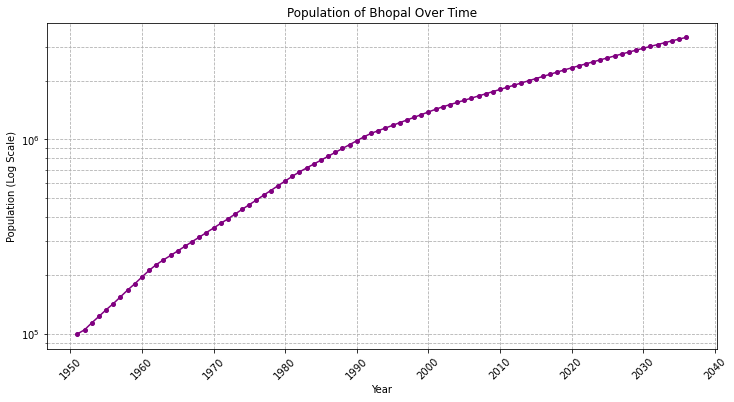

In [10]:
# Import module
import matplotlib.dates as mdates

# Plot the population over time
plt.figure(figsize=(12, 6))
plt.semilogy(df['date'], df['Population'], color='purple', marker='o', markersize=4) 

# Format the plot
plt.title('Population of Bhopal Over Time')
plt.xlabel('Year')
plt.ylabel('Population (Log Scale)')
plt.grid(True, which="both", ls="--")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(10))  # Ticks every 10 years
plt.xticks(rotation=45)

# Show the plot
plt.show()


The plot is not a straight line therefore the data is not entirely exponential. Some segments of the plot appear as roughly straight lines, this indicates periods of exponential growth in the population. The steepness of these lines can give an idea of the growth rate; steeper lines indicate faster growth.

Changes in the slope of the line on a log scale indicate changes in the growth rate. A flattening of the line suggests a slowing growth rate, while a steepening indicates an acceleration in growth.

The portion of the graph representing recent years (closer to 2023) may show the current trend in population growth. Whether this trend shows continued growth, stabilisation, or decline can be key to understanding recent and current dynamics in Bhopal.

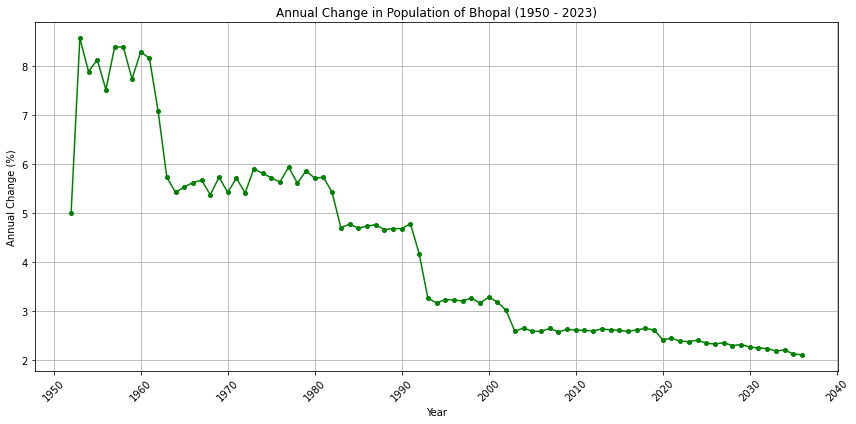

In [11]:
# Plot the line graph for Annual Change
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Annual_Change'], color='green', marker='o', markersize=4)
plt.title('Annual Change in Population of Bhopal (1950 - 2023)')
plt.xlabel('Year')
plt.ylabel('Annual Change (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


The growth rate looks like its fluctuating year to year. This indicates that the population growth in Bhopal has not been consistent but has varied due to various factors such as economic conditions, policy changes, migration, and natural events.

There are certain periods where the annual change spikes, suggesting periods of rapid population growth. These could be due to specific events or conditions such as increased migration to the city, improvements in health care leading to lower mortality rates, or periods of economic boom.

Periods where the annual change is low or negative, it might suggest a decline in population or a stabilisation phase. This could be due to factors like out-migration, policy changes affecting birth rates, or maybe economic downturns.

Significant changes in the growth rate may correlate with historical events, policy changes, economic conditions, or natural disasters. Cross-referencing these changes with historical events could provide deeper insights.

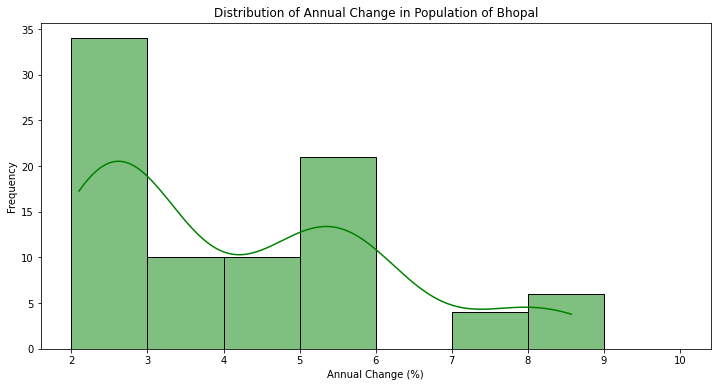

In [14]:
# Import library
import seaborn as sns

# Define the bin edges
bin_edges = [2, 3, 4, 5, 6, 7, 8, 9, 10] 

# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['Annual_Change'], kde=True, bins=[2, 3, 4, 5, 6, 7, 8, 9, 10], color='green', edgecolor='black')

# Adding labels and title
plt.xlabel('Annual Change (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Change in Population of Bhopal')

# Show the plot
plt.show()


The distribution is somewhat right-skewed, it means that while most of the data points (years) cluster around a lower range, there is a tail extending towards the higher values. This tail represents fewer years with much higher annual change rates.

The peak of the distribution is around the 2% to 3% annual change range;, this indicates that the most common annual population growth rate falls within this range. This mode represents the most densely packed area of the distribution, showing the most typical annual change values.
